# Método de Euler

El método de Euler aproxima a la función incognita por su tangente. Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t),t)
\end{align}

partimos de un punto inicial y a partir de él se calcula el valor de y para el tiempo $y + \Delta$ iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:

\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

## Ejemplo

Sea la ecuación

\begin{align}
  \frac{dy(t)}{dt} = -3.1 + 2.3 y sen(t)
\end{align}

con $y(0.5) = 4.3$

Se puede utilizar el método de Euler con $\Delta t = 0.0001$ para aproximar a la función $y(t)$ como segmentos sucesivos de sus tangentes.

Para estimar el error que cometemos en cada paso la fórmula entonces queda:

\begin{align}
  E = \frac{1}{2} \left[ 2.3\left(\frac{dy}{dt}sen(t) + ycos(t)\right) \right] (\Delta t)^2
\end{align}


In [2]:
using GLMakie
using Logging
using NBInclude


Logging.disable_logging(Logging.Info)

LogLevel(1)

In [3]:
t_0 = 0.5
y_0 = 4.3
delta = 0.0001
max_t = 30

# Inicialización
t = t_0:delta:max_t
y = zeros(length(t))
e = zeros(length(t));

In [4]:
print(t)

0.5:0.0001:30.0

In [5]:
# Euler
y[1] = y_0
for i in 1:length(t)-1
    f = -3.1 + 2.3 * y[i] * sin(t[i])
    y[i+1] = y[i] + delta * f
    e[i+1] = 2.3 * (f * sin(t[i]) + y[i] * cos(t[i])) * (delta^2) / 2
end

In [7]:
print(y)

[4.3, 4.300164151857679, 4.300328408609893, 4.300492770270095, 4.300657236851746, 4.3008218083683145, 4.300986484833272, 4.301151266260101, 4.301316152662286, 4.301481144053321, 4.301646240446706, 4.301811441855945, 4.301976748294552, 4.302142159776046, 4.30230767631395, 4.302473297921797, 4.302639024613124, 4.302804856401477, 4.302970793300406, 4.3031368353234685, 4.303302982484229, 4.303469234796256, 4.303635592273127, 4.3038020549284255, 4.3039686227757405, 4.304135295828669, 4.304302074100812, 4.304468957605779, 4.304635946357185, 4.304803040368652, 4.304970239653809, 4.305137544226289, 4.305304954099735, 4.3054724692877935, 4.305640089804119, 4.305807815662372, 4.3059756468762185, 4.306143583459333, 4.306311625425395, 4.306479772788091, 4.306648025561113, 4.306816383758162, 4.3069848473929415, 4.3071534164791645, 4.30732209103055, 4.307490871060823, 4.307659756583715, 4.307828747612964, 4.307997844162315, 4.308167046245518, 4.3083363538763315, 4.308505767068519, 4.308675285835851,

Excessive output truncated after 524288 bytes.

 188.3791362924446, 188.37759564715967, 188.37605068100902, 188.37450139410427, 188.37294778655735, 188.37138985848057, 188.3698276099866, 188.3682610411884, 188.36669015219925, 188.36511494313285, 188.36353541410318, 188.3619515652246, 188.36036339661175, 188.35877090837968, 188.35717410064376, 188.35557297351966, 188.35396752712342, 188.35235776157143, 188.35074367698041, 188.34912527346742, 188.34750255114986, 188.34587551014548, 188.34424415057234, 188.34260847254885, 188.34096847619378, 188.33932416162625, 188.3376755289657, 188.33602257833186, 188.33436530984488, 188.33270372362523, 188.3310378197937, 188.3293675984714, 188.32769305977985, 188.32601420384086, 188.32433103077656, 188.3226435407095, 188.32095173376246, 188.31925561005866, 188.3175551697216, 188.31585041287514, 188.31414133964347, 188.31242795015112, 188.31071024452297, 188.30898822288424, 188.30726188536048, 188.30553123207758, 188.30379626316181, 188.3020569787397, 188.3003133789382, 188.29856546388453, 188.296813

In [6]:
# Máximo valor absoluto del error al aproximar en el intervalo
e_max = maximum(broadcast(abs, e))

# Acumulado en el intervalo. Ojo que, si la pendiente cambia de signo
# los errores se pueden cancelar entre sí.
e_acum = sum(e)

println("Error máximo: ", e_max)
println("Error acumulado: ", e_acum)

Error máximo: 2.3083166880126602e-5
Error acumulado: 0.015960711391227643


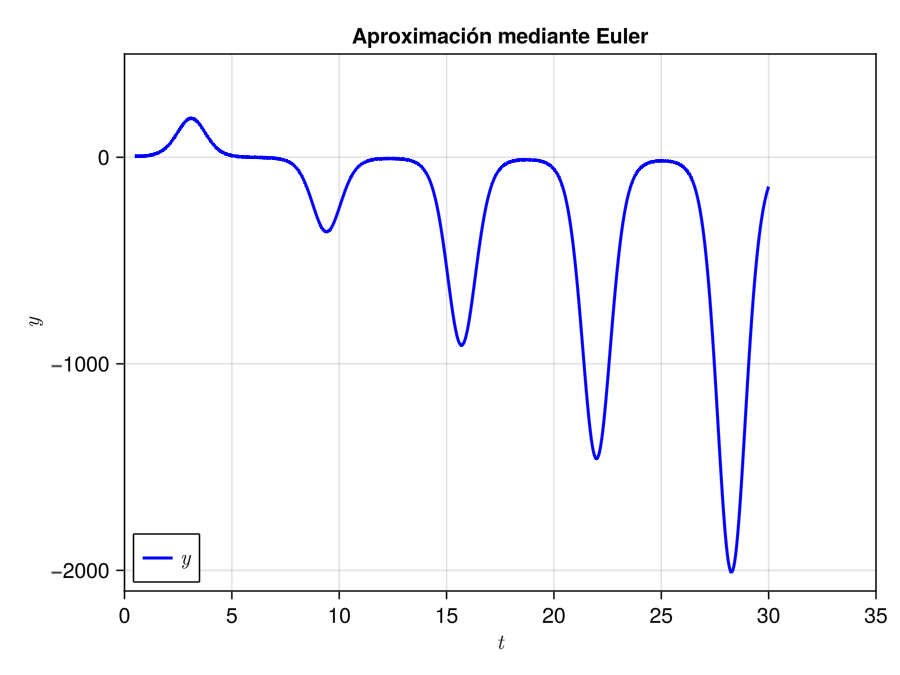

In [8]:
fig = Figure()

ax = Axis(
    fig[1, 1],
    title="Aproximación mediante Euler",
    xlabel=L"t",
    ylabel=L"y"
)

lines_red = lines!(t, y, color=:blue, label=L"y", linewidth=2)

axislegend(ax, position=:lb)
limits!(ax, 0, 35, -2100, 500)

fig

Error máximo: 2.3083166880126602e-5
Error acumulado: 0.015960711391227643


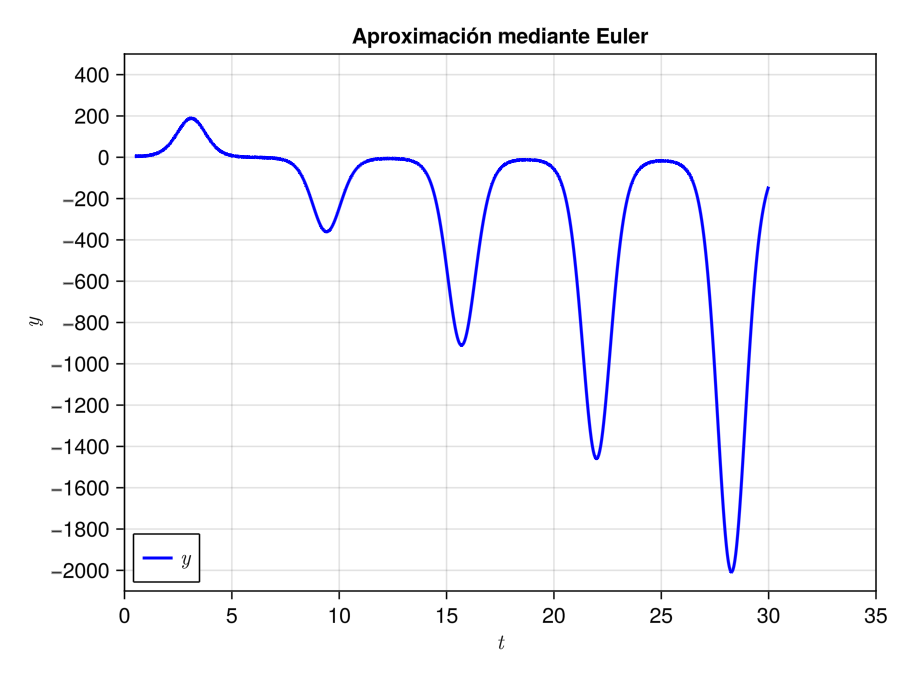

In [11]:
function euler(t_0, y_0, delta, max_t)
    t = t_0:delta:max_t
    y = zeros(length(t))
    e = zeros(length(t))

    y[1] = y_0
    for i in 1:length(t)-1
        f = -3.1 + 2.3 * y[i] * sin(t[i])
        y[i+1] = y[i] + delta * f
        e[i+1] = 2.3 * (f * sin(t[i]) + y[i] * cos(t[i])) * (delta^2) / 2
    end

    e_max = maximum(broadcast(abs, e))
    e_acum = sum(e)

    println("Error máximo: ", e_max)
    println("Error acumulado: ", e_acum)

    fig = Figure()

    ax = Axis(
        fig[1, 1],
        title="Aproximación mediante Euler",
        xlabel=L"t",
        ylabel=L"y",
        xticks=0:5:35,
        yticks=-2200:200:600,
    )

    lines_red = lines!(t, y, color=:blue, label=L"y", linewidth=2)
    limits!(ax, 0, 35, -2100, 500)
    axislegend(ax, position=:lb)

    fig
end

euler(t_0, y_0, delta, max_t)

**IMPORTANTE**: Observa cómo cambia la forma de la función dependiendo del orden de magnitud de $\Delta$. En este ejemplo la función parece tener la forma correcta, pero ve lo que pasó con la magnitud. Para que la aproximación sea válida $\Delta$ debe ser lo suficientemente pequeña para que la tangente sea una buena aproximación a la función.

# Sistema de dos ecuaciones

Supongamos que tenemos ahora un sistema de dos ecuaciones diferenciales.  Podemos utilizar una vez más el método de Euler para resolverlas, sólo debemos tener cuidado al asignar las condiciones iniciales y evaluar cada $f(t + \Delta t)$ en términos de los valores al tiempo $t$.

## Ejemplo

Sean las ecuaciones

\begin{align}
  \frac{dx(t)}{dt} &= t + cos(y) \\
  \frac{dy(t)}{dt} &= -3.1 + 2.3 y sen(x)
\end{align}

con $y(0.5) = 4.3$ y $x(y_0) = y_0 * 3.1$.

Usemos el método de Euler con $\Delta t = 0.0001$ para aproximar a la función $y(t)$ como segmentos sucesivos de sus tangentes.

In [25]:
function ejemplo_2(delta=0.0001)
    t_0 = 0.5
    y_0 = 4.3
    x_0 = y_0 * 3.1
    max_t = 30

    # Inicialización
    t = t_0:delta:max_t
    y = zeros(length(t))
    x = zeros(length(t))

    x[1] = x_0
    y[1] = y_0
    for i in 1:length(t)-1
        f_1 = t[i] * cos(y[i])
        f_2 = -3.1 + 2.3 * y[i] * sin(x[i])
        x[i+1] = x[i] + delta * f_1
        y[i+1] = y[i] + delta * f_2
    end

    return t, x, y
end

ejemplo_2 (generic function with 2 methods)

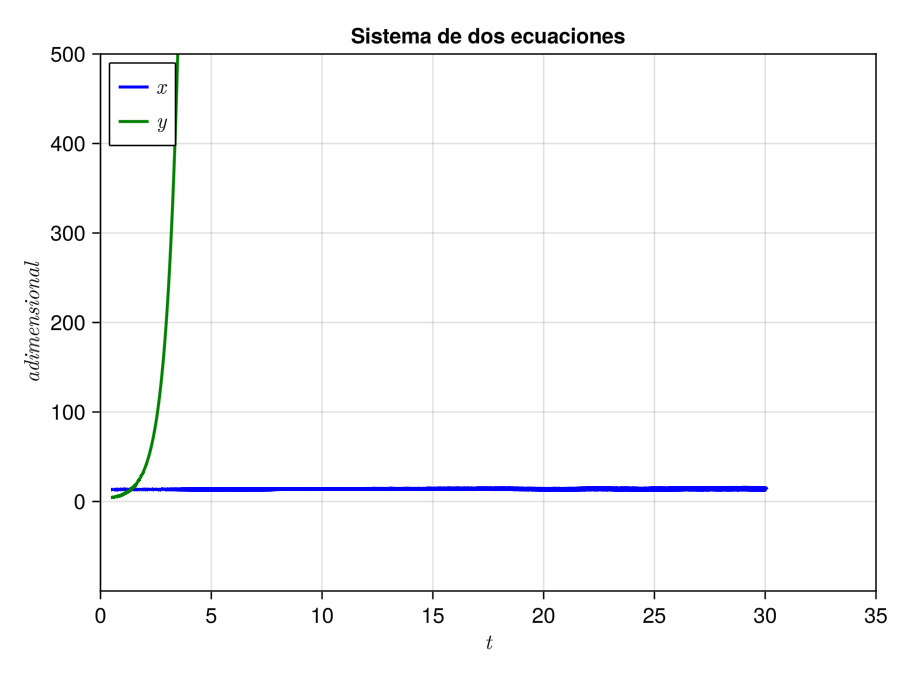

In [26]:
fig = Figure()

ax = Axis(
    fig[1, 1],
    title="Sistema de dos ecuaciones",
    xlabel=L"t",
    ylabel=L"\textit{adimensional}",
    xticks=0:5:35,
    yticks=0:100:500,
)

t, x, y = ejemplo_2()

lines_red = lines!(t, x, color=:blue, label=L"x", linewidth=2)
lines_green = lines!(t, y, color=:green, label=L"y", linewidth=2)

limits!(ax, 0, 35, -100, 500)
axislegend(ax, position=:lt)

fig

Prueba como ejercicio modificar las celdas anteriores para integrar con diferentes valores de $\Delta t$.

# Uso de bibliotecas especializadas

## Implementación usando ODEProblem

Ahora, en lugar de implementar la integración numérica manualmente, utilizaremos una biblioteca de Julia.

In [27]:
using OrdinaryDiffEq
using StaticArrays
using Interpolations

In [32]:
f(u, p, t) = -3.1 + 2.3 * u * sin(t)
tspan = (0.0, 30.0)
w = linear_interpolation(y, t)
prob = ODEProblem(f, y_0, tspan, w)
sol = solve(prob, Tsit5(), dtmax= 0.0001);

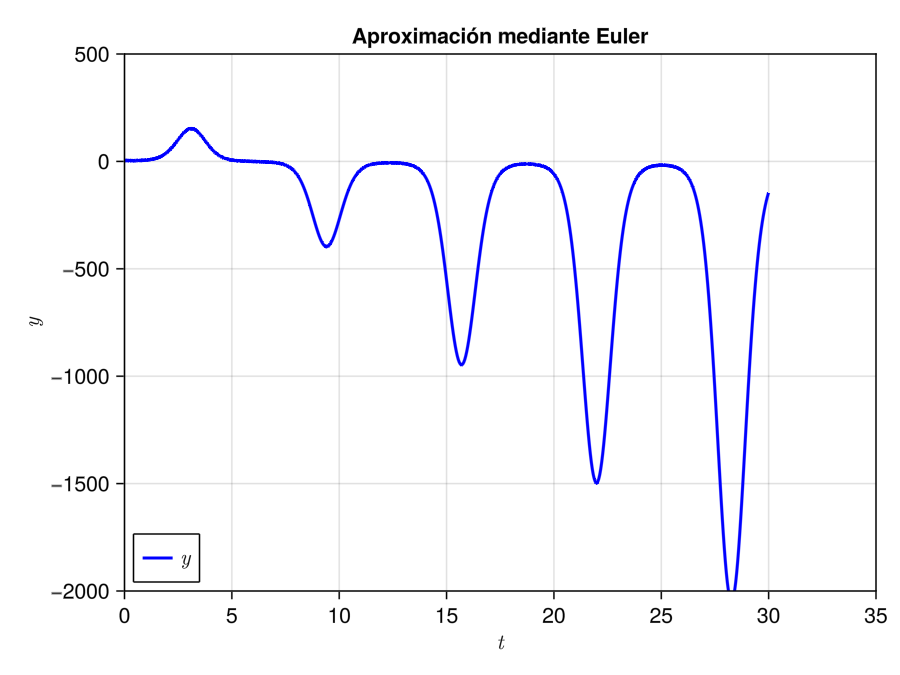

In [34]:
fig = Figure()

ax = Axis(
    fig[1, 1],
    title="Aproximación mediante Euler",
    xlabel=L"t",
    ylabel=L"y"
)

lines_red = lines!(sol.t, sol.u, color=:blue, label=L"y", linewidth=2)

axislegend(ax, position=:lb)
limits!(ax, 0, 35, -2000, 500)

fig

In [36]:
# Para varios valores inciales distintos:
y_0_set = [y_0 - 100, y_0, y_0 + 100]
colores = [:darkcyan, :red, :purple]
prob = ODEProblem(f, y_0, tspan)
sol = solve(prob, Tsit5(), dtmax=0.0001);

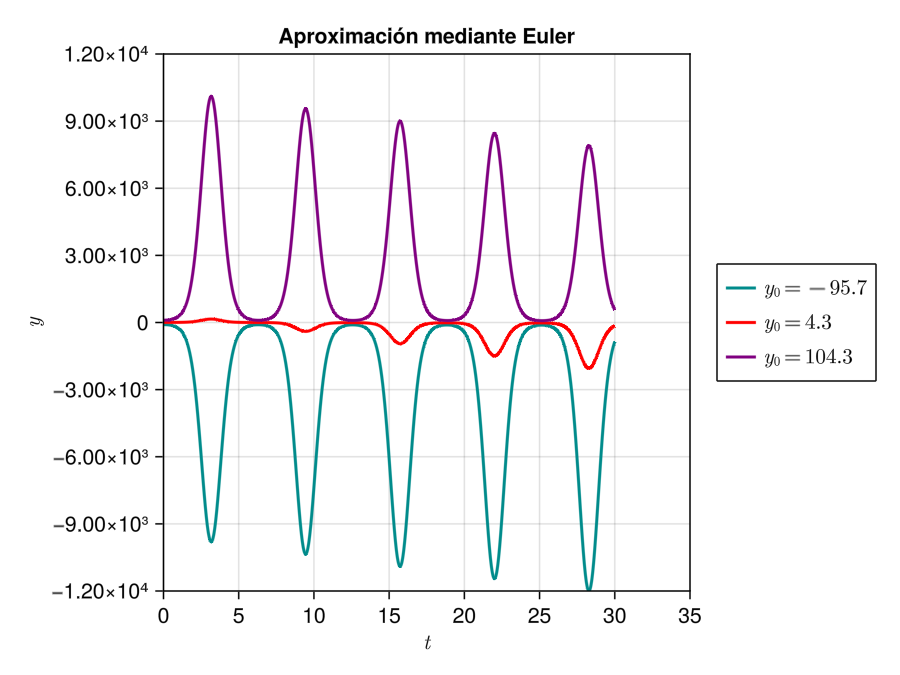

In [39]:
fig = Figure()

ax = Axis(
    fig[1, 1],
    title="Aproximación mediante Euler",
    xlabel=L"t",
    ylabel=L"y"
)

linez = Array{Any}(undef, length(y_0_set))

for (i, y_0) in enumerate(y_0_set)
    prob = ODEProblem(f, y_0, tspan, dtmax=0.0001)
    sol = solve(prob, Tsit5(), dtmax=0.0001)
    linez[i] =  lines!(sol.t, sol.u, color=colores[i], linewidth=2)
end

# axislegend(ax, position=:rt)
limits!(ax, 0, 35, -12000, 12000)
Legend(
    fig[1, 2],
    linez,
    [L"y_0 = %$y_0" for y_0 in y_0_set],
)

fig